## 1: Introduction

**Sentiment Analysis with Keras and TensorFlow**.

![Sentiment Analysis](basic_sentiment_analysis.png)


## 2: The IMDB Reviews Dataset
____
Importing IMDB dataset which is preprocessed and available in keras.
____

In [19]:
from tensorflow.python.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)#most common 10000 words from the bag of words will be used 

In [20]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [21]:
print(y_train[0])

1


In [22]:
class_names = ['Negative', 'Positive']

In [23]:
word_index = imdb.get_word_index() #returns numeric token values of particular word_index. So this is a dictionary with key value pairs
print(word_index['hello'])

4822


## 3: Decoding the Reviews
___
Decoding the reviews to have a look and idea of type of reviews.
___


In [24]:
reverse_word_index = dict((value, key) for key, value in word_index.items()) #interchanging key and value

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ' '
    return text

In [25]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [26]:
def show_len():
    print('Len of 1st training example: ', len(x_train[0]))
    print('Len of 2nd training example: ', len(x_train[1]))
    print('Len of 1st test example: ', len(x_test[0]))
    print('Len of 2nd test example: ', len(x_test[1]))
show_len()

Len of 1st training example:  218
Len of 2nd training example:  189
Len of 1st test example:  68
Len of 2nd test example:  260



## 4: Padding the Examples
___
Since reviews are not of equal lengths, it is necessary to make them of equal length before feeding them to neural networks.
___


In [27]:
word_index['the']

1

In [28]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

In [29]:
show_len()

Len of 1st training example:  256
Len of 2nd training example:  256
Len of 1st test example:  256
Len of 2nd test example:  256


In [30]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Word Embeddings
___
Explanation and Difference between One Hot Encoding and Word Embedding
___
Word Embeddings:

![Word Embeddings](word_embeddings.png)

Feature Vectors:

![Learned Embeddings](embeddings.png)


## 6: Creating and Training the Model
___
Creating and Training model using Adam Optimizer having Embedding, GlobalAveragePooling1D, and 2 Dense layers.
___

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D #using 3 different layers

model = Sequential([
    Embedding(10000, 16), #embedding can only be used as 1st layer or input layer
    GlobalAveragePooling1D(), #will convert feature representation of 10000*16 into 16D vector for each batch then it can be fed into a dense layer
    Dense(16, activation ='relu'),
    Dense(1, activation = 'sigmoid') #output layer-sigmoid gives binary classification output
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [32]:
"""from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))"""


E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 125us/sample - loss: 0.5527 - accuracy: 0.7677 - val_loss: 0.3651 - val_accuracy: 0.8612
Epoch 2/20
20000/20000 [==============================] - 2s 103us/sample - loss: 0.2895 - accuracy: 0.8910 - val_loss: 0.2990 - val_accuracy: 0.8764
Epoch 3/20
20000/20000 [==============================] - 2s 103us/sample - loss: 0.2215 - accuracy: 0.9184 - val_loss: 0.2820 - val_accuracy: 0.8872
Epoch 4/20
20000/20000 [==============================] - 2s 106us/sample - loss: 0.1813 - accuracy: 0.9342 - val_loss: 0.2831 - val_accuracy: 0.8864
Epoch 5/20
20000/20000 [==============================] - 2s 101us/sample - loss: 0.1535 - accuracy: 0.9457 - val_loss: 0.2897 - val_accuracy: 0.8894
Epoch 6/20
20000/20000 [==============================] - 2s 106us/sample - loss: 0.1309 - accuracy: 0.9556 - val_loss: 0.3168 - val_accuracy: 0.8830
Epoch 7/20
20000/20000 [===========================

## 7: Predictions and Evaluation
___
Plotting the graph of Training dataset accuracy and Validation dataset accuracy and finding out accuracy percentage of the model.
___


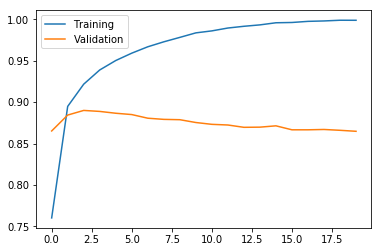

In [17]:
import  matplotlib.pyplot as plt
%matplotlib inline


plt.plot(range(E), h.history['acc'], label = 'Training')
plt.plot(range(E), h.history['val_acc'], label = 'Validation')
plt.legend()
plt.show()

In [18]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc*100)

25000/25000 [==============================] - 1s 44us/step
Test set accuracy:  84.08


In [19]:
import numpy as np

p = model.predict(np.expand_dims(x_test[0], axis = 0)) #expanding the dimension of first example to make it suitable for our predict() method
print(class_names[np.argmax(p[0])])


Negative


In [20]:
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the